Python was not able to load the fast fortran assembly routines.

Python was not able to load the fast fortran material routines.



<IPython.core.display.Javascript object>


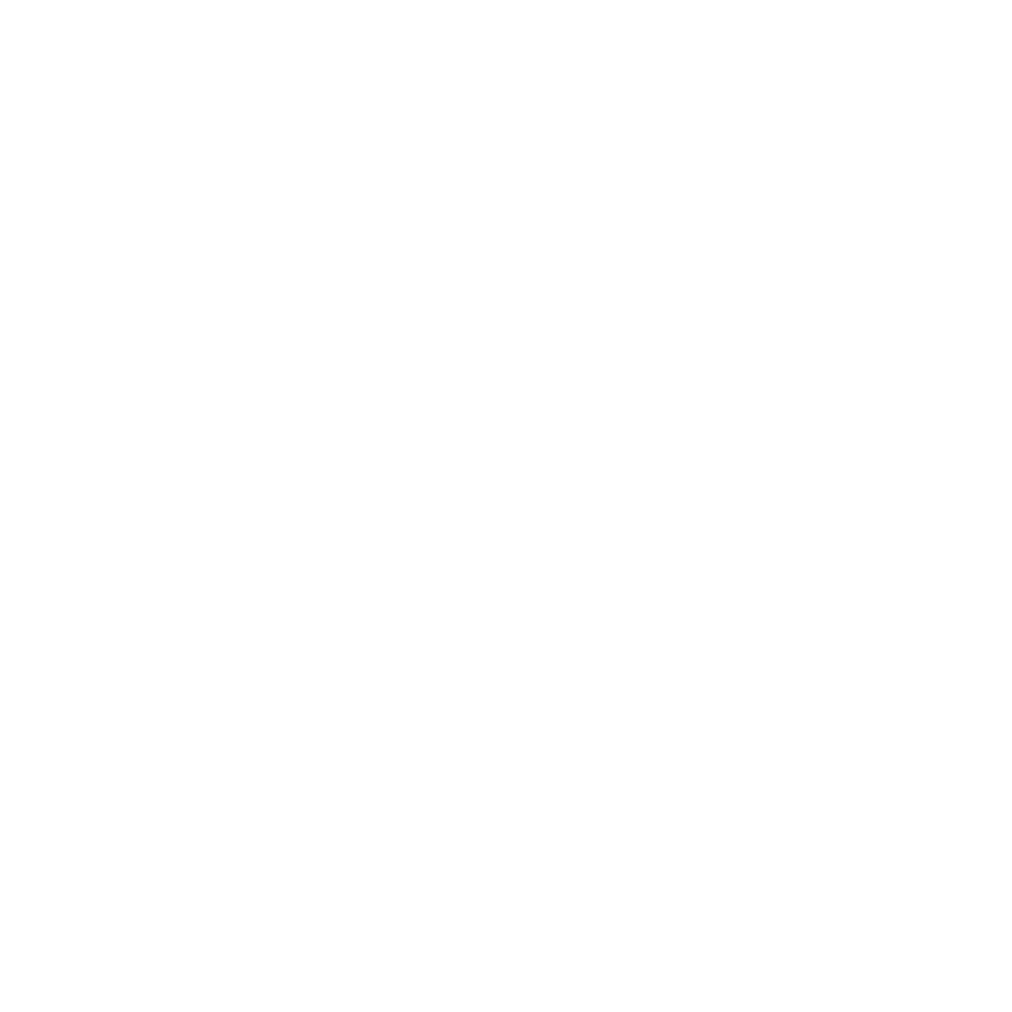

(-80, 80)

In [1]:
# importing lib and setting a list of meshes to be tested
import sys 
import amfe
import matplotlib.pyplot as plt
import numpy as np
import scipy
import copy
import pandas as pd
import mpl_toolkits.mplot3d as a3
%matplotlib notebook

msh_dict = {}
msh_dict[0] = amfe.amfe_dir('meshes/test_meshes/turbine_section_par_1.msh')
msh_dict[1] = amfe.amfe_dir('meshes/test_meshes/turbine_section_par_2.msh')
msh_dict[2] = amfe.amfe_dir('meshes/test_meshes/turbine_section_par_3.msh')


domain_id = {}
domain_id[0] = 16
domain_id[1] = 16
domain_id[2] = 16

# select mesh to be plotted
mesh_id1 = 0
mshfile = msh_dict[mesh_id1]

m1 = amfe.Mesh()
m1.import_msh(mshfile)

fig = plt.figure(figsize=(30, 30), dpi= 30, facecolor='w', edgecolor='k')
ax = a3.Axes3D(fig)
ax = amfe.plot3Dmesh(m1,ax,alpha=0.2, plot_nodes = False)
#ax.set_axis_off()
#ax.view_init(90, -90)
ax.set_xlim([-80,80])
ax.set_ylim([90,250])
ax.set_zlim([-80,80])
#plt.show()

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 2054 elements and 2373 dofs.
Time taken for preallocation: 0.03 seconds.


(-80, 80)

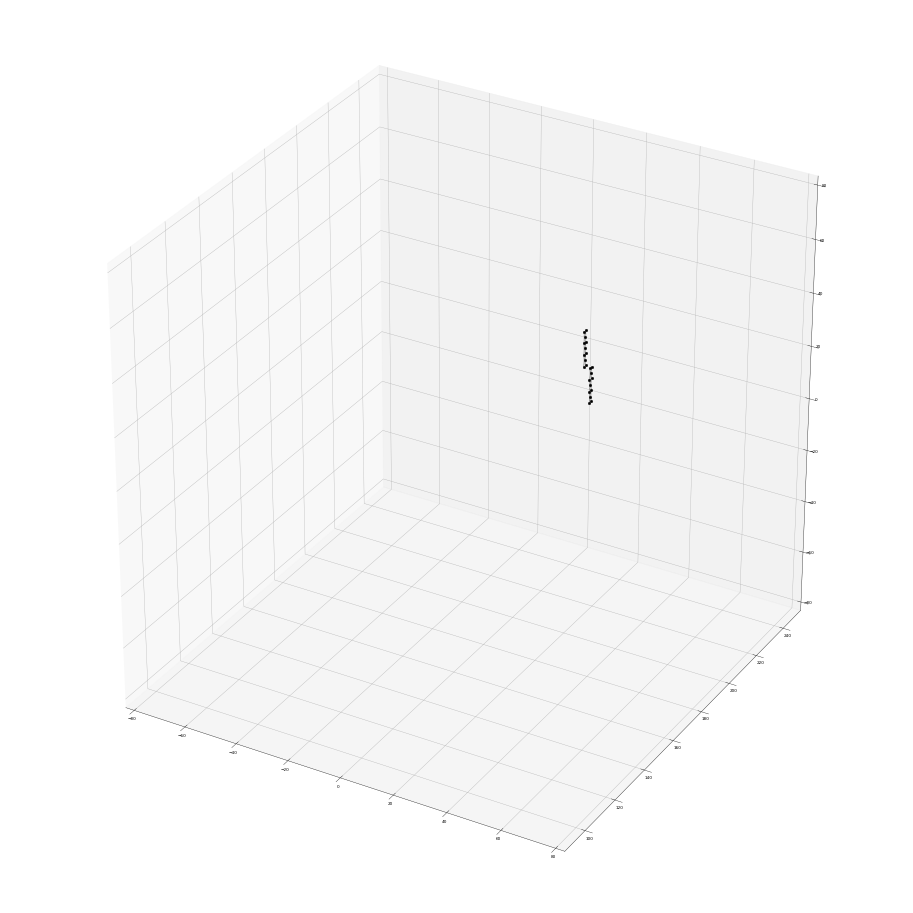

In [2]:
# creating material
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3,  plane_stress=False)

# creating a mechanical component
my_comp = amfe.MechanicalSystem()

# setting mesh object and selecting problem domain
my_comp.set_mesh_obj(m1)
domain = my_comp.set_domain(16,my_material)

m1.split_in_groups()
groups = m1.groups

fig = plt.figure(figsize=(30, 30), dpi= 30, facecolor='w', edgecolor='k')
ax = a3.Axes3D(fig)
ax = amfe.plot3D_submesh(groups[7], ax, plot_nodes = True)
#ax.view_init(90, -90)
ax.set_xlim([-80,80])
ax.set_ylim([90,250])
ax.set_zlim([-80,80])
#plt.show()


In [3]:
# setting B.C.
value = 1e8
my_comp.apply_dirichlet_boundaries(1, 'xyz')
my_comp.apply_neumann_boundaries(7, value, 'normal')

# solving linear static problem
s = amfe.LinearStaticsSolver(my_comp)
s.solve()

Attention: No linear solver was given, setting linear_solver = PardisoSolver.
Attention: No pseudo time evaluation was given, setting t = 1.0.
Assembling external force and stiffness...


C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\scipy\sparse\sputils.py:115: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")


Start solving linear static problem...
Static problem solved.


array([-4.17557287e+01, -1.61965897e+00, -7.64409661e+00, ...,
       -1.52241309e+00,  6.14603236e-03,  1.26514118e-02])

In [4]:
def plot_static(scale=1):
    fig = plt.figure(figsize=(30, 30), dpi= 30, facecolor='w', edgecolor='k')
    ax = a3.Axes3D(fig)
    ax = amfe.plot_3D_displacement(my_comp, ax=ax, scale=scale)
    ax.set_xlim([-80,80])
    ax.set_ylim([90,250])
    ax.set_zlim([-80,80])
    ax.view_init(90, -90)
    #plt.show()

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(plot_static,scale=(0,2,0.1)) 

interactive(children=(FloatSlider(value=1.0, description='scale', max=2.0), Output()), _dom_classes=('widget-i…

<function __main__.plot_static(scale=1)>

In [5]:
K = my_comp.assembly_class.stiffness.todense()

In [6]:
amfe.save_object(K,'K1_3d.pkl')